### Question 1

In [23]:
# Install package for obtaining USGS streamflow data
!pip install -U dataretrieval

In [24]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '14056500'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='1987-10-01', end='1991-09-30')
df

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
1987-10-01 00:00:00+00:00,732.0,A,14056500
1987-10-02 00:00:00+00:00,722.0,A,14056500
1987-10-03 00:00:00+00:00,700.0,A,14056500
1987-10-04 00:00:00+00:00,701.0,A,14056500
1987-10-05 00:00:00+00:00,701.0,A,14056500
...,...,...,...
1991-09-25 00:00:00+00:00,962.0,A,14056500
1991-09-26 00:00:00+00:00,907.0,A,14056500
1991-09-27 00:00:00+00:00,882.0,A,14056500


<AxesSubplot:xlabel='datetime'>

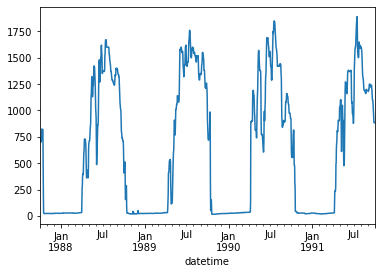

In [25]:
# Simple plot
df['00060_Mean'].plot()

# Question 1

Question 1 Answer) This plot is the mean over the course of a few years, where we see a vary drastic change in water level over the course for each of the individual years. The reason it seems to stop is because the frozen resevoir stopped flowwing during the winter months to reserve water for the summers. 

In [91]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
LaPine = '14056500'
Bend = '14064500'
Tokatee = '14312900'
SteamBoat = '14316700'
list = [LaPine, Tokatee, SteamBoat]
# Get instantaneous values (iv)
df1 = nwis.get_record(sites=LaPine, service='dv', start='1990-09-30', end='1991-09-30')
df2 = nwis.get_record(sites=Bend, service='dv', start='1906-04-01', end='1907-04-01')
df3 = nwis.get_record(sites=Tokatee,service='dv', start='1990-09-30', end='1991-09-30')
df4 = nwis.get_record(sites=SteamBoat,service='dv', start='1990-09-30', end='1991-09-30')
df_final = nwis.get_record(sites=list,service='dv', start='1990-09-30', end='1991-09-30')
# df2

In [27]:
toHTML = df_final[['00060_Mean']].copy()

In [28]:
toHTML_Print = toHTML.to_html()
print(toHTML_Print)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>00060_Mean</th>
    </tr>
    <tr>
      <th>site_no</th>
      <th>datetime</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="365" valign="top">14056500</th>
      <th>1990-09-30 00:00:00+00:00</th>
      <td>923.0</td>
    </tr>
    <tr>
      <th>1990-10-01 00:00:00+00:00</th>
      <td>772.0</td>
    </tr>
    <tr>
      <th>1990-10-02 00:00:00+00:00</th>
      <td>595.0</td>
    </tr>
    <tr>
      <th>1990-10-03 00:00:00+00:00</th>
      <td>555.0</td>
    </tr>
    <tr>
      <th>1990-10-04 00:00:00+00:00</th>
      <td>561.0</td>
    </tr>
    <tr>
      <th>1990-10-05 00:00:00+00:00</th>
      <td>557.0</td>
    </tr>
    <tr>
      <th>1990-10-06 00:00:00+00:00</th>
      <td>555.0</td>
    </tr>
    <tr>
      <th>1990-10-07 00:00:00+00:00</th>
      <td>553.0</td>
    </tr>
    <tr>
      <th>1990-10-08 00:00:00+00:00</t

# Question 2

<table border="0">
    <tr>
        <th>site_name</th>
        <th>site_number</th>
        <th>Mean_of_mean</th>
    </tr>
    <tr>
        <th>WICCIUP RES</th>
        <th>14056500</th>
        <th>626</th>
    </tr>
    <tr>
        <th>BENHAM FALLS</th>
        <th>14064500</th>
        <th>1500</th>
    </tr>
    <tr>
        <th>STEAM BOAT CREEK</th>
        <th>14316700</th>
        <th>36</th>
    </tr>    
</table>
            

In [29]:
!pip install folium

In [30]:
# Import packages
import numpy as np
import pandas as pd
import folium

In [31]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [90]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
# mountains

In [33]:
# Read HTML table data
# mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
# mountains

In [34]:
# Print number of tables on webpage
len(mountains)

13

In [35]:
mountain_stats = mountains[1]

In [36]:
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [88]:
# mountain_stats

In [89]:
# mountain_stats.dtypes

In [39]:
mountain_stats['Location'].iloc[0]

'45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W'

In [40]:
# The latitude is string position 27 to 34
lat1 = mountain_stats['Location'].iloc[0][27:34]

# The longitude is string position 37 to 45
lon1 = mountain_stats['Location'].iloc[0][37:45]

In [41]:
# Convert to float and multiple by -1
float(mountain_stats['Location'].iloc[0][37:45]) * -1

-121.6959

In [92]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
# coords

In [43]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i]).add_to(map)
# map

In [44]:
# Get elevation value as a float
float(mountain_stats['Elevation'].iloc[0][:-2])

3428.8

# Question 3 (below)

In [45]:
# To get these data from every row, we can write another quick for loop
isolation = []
for i in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[i][:-2])
    isolation.append(iso)
# isolation

In [46]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=isolation[i]).add_to(map)
map

I started multiple lines of the pop up for a name string, but this was harder than I thought.

In [77]:
!pip3 install webdriver_manager
!pip install selenium

In [78]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

In [79]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

In [86]:
'''
# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")
'''

'\n# Retrieve ski resort names\nhtml_list = driver.find_element(By.ID, "mw-pages")\nitems = html_list.find_elements(By.TAG_NAME, "li")\n'

In [84]:
'''
ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()
'''

'\nski_resort_names = []\nfor item in items:\n    text = item.text\n    print(text)\n    ski_resort_names.append(text)\ndriver.close()\n'

In [85]:
'''
# Define test URL
url = 'https://www.google.com/maps/place/Hoodoo+Ski+Area+Oregon/'

# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open URL
driver.get(url
'''

"\n# Define test URL\nurl = 'https://www.google.com/maps/place/Hoodoo+Ski+Area+Oregon/'\n\n# Install Chrome webdriver\ndriver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))\n\n# Open URL\ndriver.get(url\n"

In [53]:
# Click search
element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
element.click()

In [54]:
# Retrieve the URL
link = driver.current_url

# We can find the first occurrence of a character by using the "find" method
link.find('@')

50

In [55]:
split1 = link.rsplit('@', 1)
split1

['https://www.google.com/maps/place/Hoodoo+Ski+Area/',
 '44.4086439,-121.8736045,17z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158']

In [56]:
split2 = split1[1].rsplit(',', 1)
split2

['44.4086439,-121.8736045',
 '17z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158']

In [57]:
split3 = split2[0].rsplit(',', 1)
split3

['44.4086439', '-121.8736045']

In [58]:
# Here's the "one-liner"
lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)

In [87]:
# driver.close()

In [66]:
import time

ski_resort_coords = []
# Loop through every ski resort to find it's coordinates
for resort in ski_resort_names:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + resort + ' Oregon/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    time.sleep(2)
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 60).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    ski_resort_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Lumin\.wdm\drivers\chromedriver\win32\98.0.4758.102]


====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow643

In [67]:
true_coords = [('44.9629273', '-118.2357075'),
 ('42.081689', '-122.7069373'),
 ('45.4188609', '-121.6064311'),
 ('45.2816889', '-117.1148251'),
 ('44.4086477', '-121.8735991'),
 ('42.081689', '-122.7069373'),
 ('44.0028975', '-121.6812547'),
 ('45.331759', '-121.6673681'),
 ('45.2943906', '-121.80705'),
 ('45.2871456', '-121.7312248'),
 ('45.7552462', '-118.0536043'),
 ('43.9688848', '-125.7230331'),
 ('45.3233604', '-121.7891084'),
 ('42.237378', '-120.2968217'),
 ('43.6000579', '-122.0387233')]

In [68]:
ski_resort_coords

[('44.9629235', '-118.2357129'),
 ('42.081685', '-122.7069427'),
 ('45.4188458', '-121.6064525'),
 ('45.2816851', '-117.1148305'),
 ('44.4086439', '-121.8736045'),
 ('42.081685', '-122.7069427'),
 ('44.0028937', '-121.6812601'),
 ('45.3317552', '-121.6673735'),
 ('45.2943342', '-121.789626'),
 ('45.2871418', '-121.7312302'),
 ('45.7552425', '-118.0536097'),
 ('44.0462174', '-123.0667776'),
 ('45.3311281', '-121.7131951'),
 ('42.237374', '-120.2968271'),
 ('43.600054', '-122.0387287')]

In [69]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(ski_resort_coords)):
    folium.Marker(ski_resort_coords[i], popup=ski_resort_names[i]).add_to(map)
map

# Question 4 (below)

In [73]:
to_fetch = ['1844 SW Morrison St, Portland, OR 97205',
            '800 Occidental Ave S, Seattle, WA 98134',
            '1001 Stadium Dr, Inglewood, CA 90301',
            '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

In [81]:
import time

home_coords = []
# Loop through every ski resort to find it's coordinates
for item in to_fetch:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + item
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    time.sleep(2)
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 60).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    home_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

In [82]:
home_coords

[('45.5216776', '-122.693017'),
 ('47.5933101', '-122.3344609'),
 ('33.9530049', '-118.3407129'),
 ('44.0594287', '-123.0710918')]

In [95]:
map = folium.Map(location=[42, -121], zoom_start=5)
for i in range(0, len(home_coords)):
    folium.Marker(home_coords[i], popup=to_fetch[i]).add_to(map)
map

In [98]:
!pip install xarray

In [99]:
import xarray as xr

fp = '/Users/Lumin/OneDrive/Documents/geospatial-data-science/lab7'

xds = xr.open_dataset(fp + '/era_monthly_snowfall_2020.nc', decode_coords='all')

In [100]:
xds

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, time: 12)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Data variables:
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:04:05 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

# Question 5

The region with the most snow fall in 2020 out of Mount Ashland, Willammette Pass or Hoodoo is mount Hoodoo I believe, though I had known that before hand because of a conversation with my family. 